# Marketing and Retail Analytics - Capstone project

### Problem Statement - I

In the recent past, e-commerce companies have emerged and flourished in the industry. They offer the convenience to order from a wide variety of options from the comfort of one’s home. But how do they offer these “wide variety of options or products”? To be able to meet the demands of the customers, any e-commerce company would obviously need to store tons and tons of products in warehouses. Now, some of these warehoused products might be fast-moving products which sell very quickly and some others might be slow-moving. Each of the products being stored incurs a cost to the company in terms of space and maintenance. Since storing these products obviously add to the costs that the company incurs, it is absolutely necessary for the organisations to plan their inventory well.

 

Now, OList is one such e-commerce company that has faced some losses recently and they want to manage their inventory very well so as to reduce any unnecessary costs that they might be bearing. In this assignment, you have to manage the inventory cost of this e-commerce company OList. You need to identify top products that contribute to the revenue and also use market basket analysis to analyse the purchase behaviour of individual customers to estimate with relative certainty, what items are more likely to be purchased individually or in combination with some other products.

### Project Pipeline

##### Data exploration and cleaning:
   Identify missing and duplicate values in each column and treat them accordingly. Also, treat any and all data quality issues associated with the dataset.
##### Data visualisation: 
   Create appropriate visualisations to identify the most ordered products by quantity and revenue.
##### Market basket analysis: 
   Identify combinations of product categories that are ordered frequently and visualise them as required. This can be done by creating a simple matrix with product categories in the rows and columns and then checking which of the pairs show associations.

In [1]:
# Importing all the libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Step - 1

## Need to Read the data set which has been provided to us
   As there are multiple sheets in the excel file so we need to import all the worksheets one by one
   
### 1. Orders

In [2]:
Orders_sheet = pd.read_excel(r"S:\UPGRAD PG\Shivkumar Final Capstone\Retail_dataset.xlsx", sheet_name = "orders")
Orders_sheet.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [3]:
Orders_sheet.shape

(99441, 7)

In [4]:
Orders_sheet["order_status"].unique() # Checking the types of status in order_status

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [5]:
# As we have been told to consider only order status having Delivered

In [6]:
#Checking the total number of 'delivered' orders

(Orders_sheet.order_status=="delivered").sum()

96478

In [7]:
#Now we need to convert the Orders_sheet dataframe with order_status as 'delivered'.

Orders_sheet = Orders_sheet[Orders_sheet.order_status=="delivered"]
Orders_sheet.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26


In [8]:
Orders_sheet.shape

(96478, 7)

In [9]:
# So now we have a dataframe named Order_sheet having order status as Delivered, Lets confirm it.
Orders_sheet["order_status"].unique()

array(['delivered'], dtype=object)

In [10]:
# Checking if order_id has any Duplicates and Null values
Orders_sheet["order_id"].duplicated().sum()

0

In [11]:
#Checking missing values.

Orders_sheet.isnull().sum().sort_values(ascending=False)

order_approved_at                14
order_delivered_timestamp         8
order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_estimated_delivery_date     0
dtype: int64

In [12]:
#Replacing the values of order_approved_at with order_purchase_timestamp

Orders_sheet["order_approved_at"].fillna(Orders_sheet["order_purchase_timestamp"],inplace=True)

#Replacing the values of order_delivered_timestamp with order_estimated_delivery_date

Orders_sheet["order_delivered_timestamp"].fillna(Orders_sheet["order_estimated_delivery_date"], inplace=True)

In [13]:
#Checking for missing values again to confirm no missing values.

Orders_sheet.isnull().sum().sort_values(ascending=False)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
dtype: int64

#### So now we can see that all null or missing values have been replaced sucessfully
 Now we need to do same steps for all other work sheets 

### 2. Order_items

In [14]:
# Reading the Order_items sheet

Orderitems_sheet = pd.read_excel(r"S:\UPGRAD PG\Shivkumar Final Capstone\Retail_dataset.xlsx", sheet_name="order_items")
Orderitems_sheet.head()

,order_id,order_item_id,product_id,seller_id,price,shipping_charges
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14


In [15]:
Orderitems_sheet.shape

(112650, 6)

In [16]:
Orderitems_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          112650 non-null  object 
 1   order_item_id     112650 non-null  int64  
 2   product_id        112650 non-null  object 
 3   seller_id         112650 non-null  object 
 4   price             112650 non-null  float64
 5   shipping_charges  112650 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 5.2+ MB


In [17]:
# Checking for null/missing values if any

Orderitems_sheet.isnull().sum().sort_values(ascending=False)

order_id            0
order_item_id       0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

### 3. Customers

In [18]:
# Reading the Order_items sheet

Customers_sheet = pd.read_excel(r"S:\UPGRAD PG\Shivkumar Final Capstone\Retail_dataset.xlsx", sheet_name="customers")
Customers_sheet.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [19]:
Customers_sheet.shape

(99441, 4)

In [20]:
#Checking if any missing values are there.

Customers_sheet.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [21]:
#Checking for duplicates in customer sheets

Customers_sheet["customer_id"].duplicated().sum()

3345

In [22]:
#Dropping the duplicates from the sheets

Customers_sheet.drop_duplicates(subset="customer_id", keep="first", inplace=True)

In [23]:
#Checking the shape after dropping duplicates. It is less now 99441 - 3345 = 96096

Customers_sheet.shape

(96096, 4)

In [24]:
#Once again looking for duplicate values if any

Customers_sheet["customer_id"].duplicated().sum()

0

### 4. Payments

In [25]:
# Reading the Payments sheet
Payments_sheet = pd.read_excel(r"S:\UPGRAD PG\Shivkumar Final Capstone\Retail_dataset.xlsx", sheet_name="payments")
Payments_sheet.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
Payments_sheet.shape

(103886, 5)

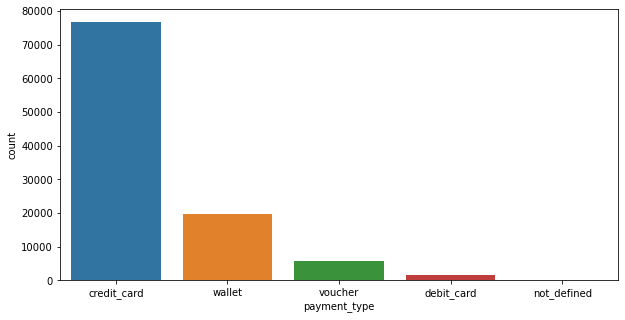

In [27]:
#Checking the most used 'payment_type' and their counts.

plt.figure(figsize=(10,5))
sns.countplot(data=Payments_sheet, x=Payments_sheet['payment_type'])
plt.show()

- We can observe Credit card is the most used payment type and also we see there are some payments not defined we need to sort it out

In [28]:
#Checking the payments 'not defined' affected rows and their count
Payments_sheet[Payments_sheet['payment_type']=='not_defined'].count()

order_id                3
payment_sequential      3
payment_type            3
payment_installments    3
payment_value           3
dtype: int64

In [29]:
Payments_sheet[Payments_sheet['payment_type']=='not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [30]:
#As we have seen there are only 3 rows with payment type as "not defined" so can drop it. 

a = Payments_sheet[Payments_sheet['payment_type']=='not_defined'].index
Payments_sheet.drop(a, axis=0, inplace=True)

In [31]:
# Now we need to confirm if payment type 'not_defined' is dropped or not.

Payments_sheet["payment_type"].unique()

array(['credit_card', 'wallet', 'voucher', 'debit_card'], dtype=object)

In [32]:
#Checking missing values.
Payments_sheet.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### 5. Products

In [33]:
# Reading the Products sheet

Products_sheet = pd.read_excel(r"S:\UPGRAD PG\Shivkumar Final Capstone\Retail_dataset.xlsx", sheet_name="products")

In [34]:
Products_sheet.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,625.0,20.0,17.0,13.0


In [35]:
Products_sheet.shape

(32951, 6)

In [36]:
Products_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32781 non-null  object 
 2   product_weight_g       32949 non-null  float64
 3   product_length_cm      32949 non-null  float64
 4   product_height_cm      32949 non-null  float64
 5   product_width_cm       32949 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [37]:
Products_sheet.columns

Index(['product_id', 'product_category_name', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [38]:
Products_sheet['product_category_name'].value_counts(normalize = True)*100

toys                                 75.424789
bed_bath_table                        2.406882
sports_leisure                        2.199445
furniture_decor                       2.095726
health_beauty                         1.976755
                                       ...    
home_comfort_2                        0.003051
diapers_and_hygiene                   0.003051
security_and_services                 0.003051
furniture_mattress_and_upholstery     0.003051
fashion_childrens_clothes             0.003051
Name: product_category_name, Length: 70, dtype: float64

- From above we can observe that product category "Toys" are the major category covered almost 75% of all category.

In [39]:
#Checking missing values.

Products_sheet.isna().sum().sort_values(ascending=False)

product_category_name    170
product_weight_g           2
product_length_cm          2
product_height_cm          2
product_width_cm           2
product_id                 0
dtype: int64

In [40]:
type(Products_sheet["product_category_name"].mode())

pandas.core.series.Series

In [41]:
#Checking the mode of "product_category_name" for replacing the categorical variable - 'product_category_name'

Products_sheet["product_category_name"].mode()

0    toys
dtype: object

In [42]:
#Replacing the NULL values of product_category_name columns.

Products_sheet["product_category_name"].fillna(Products_sheet["product_category_name"].mode()[0], inplace=True)

In [43]:
#Checking missing values again for remaining columns.

Products_sheet.isna().sum().sort_values(ascending=False)

product_weight_g         2
product_length_cm        2
product_height_cm        2
product_width_cm         2
product_id               0
product_category_name    0
dtype: int64

In [44]:
#Checking the statistical data to find solution for the NULL values of remaining columns
Products_sheet.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000
mean,2276.472488,30.815078,16.937661,23.196728
std,4282.038731,16.914458,13.637554,12.079047
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


- So the question is how to replace the missing values of remaining numerical column by mean or by median, we can see the mean 
    value above but we need to look at the median as well.

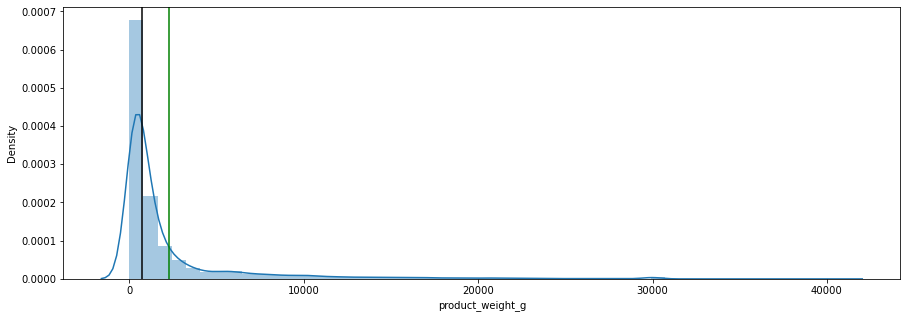

In [45]:
#Visualizing the product_weight_g for skewness

plt.figure(figsize=(15,5))
sns.distplot(Products_sheet.product_weight_g)
plt.axvline(Products_sheet.product_weight_g.mean(), color="green")
plt.axvline(Products_sheet.product_weight_g.median(), color="black")
plt.show()

- So we can observe that the above graph is skewed

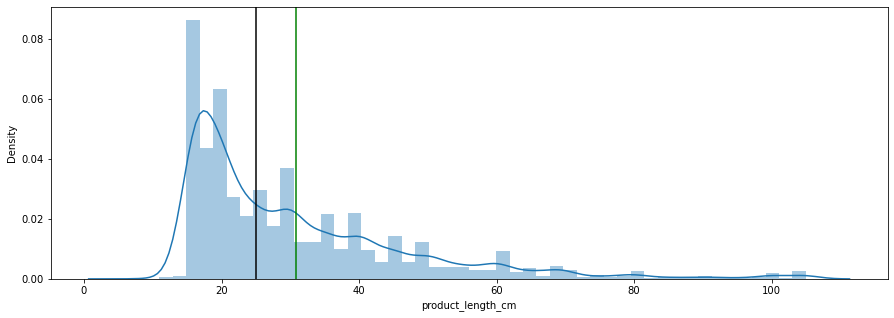

In [46]:
#Visualizing the product_length_cm for data skewness

plt.figure(figsize=(15,5))
sns.distplot(Products_sheet.product_length_cm)
plt.axvline(Products_sheet.product_length_cm.mean(), color="green")
plt.axvline(Products_sheet.product_length_cm.median(), color="black")
plt.show()

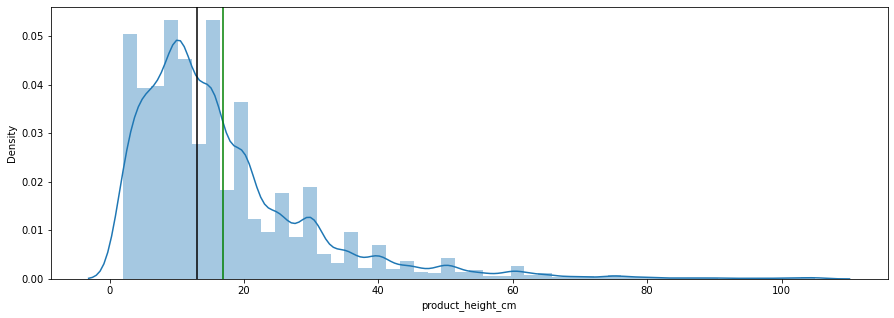

In [47]:
#Visualizing the product_height_cm for skewness

plt.figure(figsize=(15,5))
sns.distplot(Products_sheet.product_height_cm)
plt.axvline(Products_sheet.product_height_cm.mean(), color="green")
plt.axvline(Products_sheet.product_height_cm.median(), color="black")
plt.show()

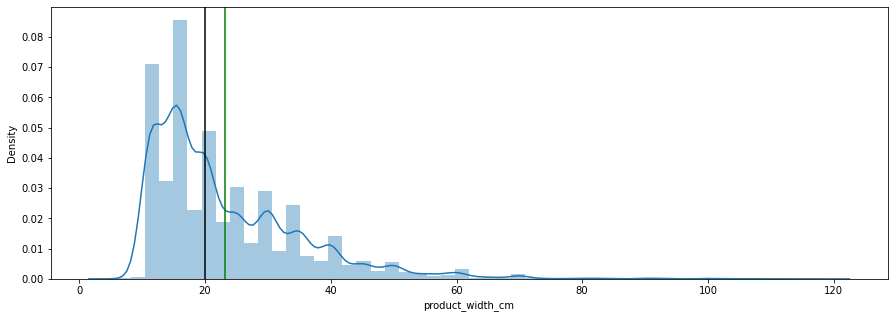

In [48]:
#Visualizing the product_width_cm for skewness

plt.figure(figsize=(15,5))
sns.distplot(Products_sheet.product_width_cm)
plt.axvline(Products_sheet.product_width_cm.mean(), color="green")
plt.axvline(Products_sheet.product_width_cm.median(), color="black")
plt.show()

- All the above graphs are skewed so need to replace the missing values of all numerical columns by median values

In [49]:
Products_sheet['product_weight_g'].median()

700.0

In [50]:
Products_sheet['product_length_cm'].median()

25.0

In [51]:
Products_sheet['product_height_cm'].median()

13.0

In [52]:
Products_sheet['product_width_cm'].median()

20.0

In [53]:
#Replacing the missing values with Median.

Products_sheet.product_weight_g.fillna(Products_sheet.product_weight_g.median(), inplace=True)
Products_sheet.product_length_cm.fillna(Products_sheet.product_length_cm.median(), inplace=True)
Products_sheet.product_height_cm.fillna(Products_sheet.product_height_cm.median(), inplace=True)
Products_sheet.product_width_cm.fillna(Products_sheet.product_width_cm.median(), inplace=True)

In [54]:
#Validating missing values after replacing.

Products_sheet.isna().sum().sort_values(ascending=False)

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

- So now all the basic work is done we have cleaned all the worksheets  is now ready.
- At first we need to merge all the data sheets in to one excel file and extract it.

#### Now, as we need extract the excel sheet for visualization  and we need to merge and prepare data for market basket analysis:

#### 1. Extracting data in the form of excel files.

#### 2. Market Basket analysis using apriori alogorithm. 

In [55]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('Retail_dataset_Cleaned.xlsx', engine='xlsxwriter')

In [56]:
# Write each dataframe to a different worksheet.
Orders_sheet.to_excel(writer, sheet_name='Orders')
Orderitems_sheet.to_excel(writer, sheet_name='Orderitems')
Customers_sheet.to_excel(writer, sheet_name='Customers')
Payments_sheet.to_excel(writer, sheet_name='Payments')
Products_sheet.to_excel(writer, sheet_name='Products')

In [57]:
# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [58]:
# At first we need to create a new dataframe named "Delivered_orders" merging all the others sheets

Delivered_orders= pd.merge(Orders_sheet,Orderitems_sheet,how='inner',on='order_id')

In [59]:
Delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [60]:
Delivered_orders.shape

(110197, 12)

In [61]:
Delivered_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
dtype: int64

In [62]:
#Merging 'Delivered_orders' with 'Products_sheet'

Delivered_orders = pd.merge(Delivered_orders,Products_sheet,how='inner',on='product_id')

In [63]:
Delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,price,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,500.0,19.0,8.0,13.0
1,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,500.0,19.0,8.0,13.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,500.0,19.0,8.0,13.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,e781fdcc107d13d865fc7698711cc572,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,500.0,19.0,8.0,13.0
4,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76,toys,400.0,19.0,13.0,19.0


In [64]:
Delivered_orders.shape

(110197, 17)

In [65]:
Delivered_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
dtype: int64

In [66]:
#Merging 'Delivered_orders' with 'Payments_sheet'

Delivered_orders = pd.merge(Delivered_orders,Payments_sheet,how='inner',on='order_id')

In [67]:
Delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,shipping_charges,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.72,housewares,500.0,19.0,8.0,13.0,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.72,housewares,500.0,19.0,8.0,13.0,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,8.72,housewares,500.0,19.0,8.0,13.0,2,voucher,1,18.59
3,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,7.78,housewares,500.0,19.0,8.0,13.0,1,credit_card,3,37.77
4,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,7.78,housewares,500.0,19.0,8.0,13.0,1,credit_card,1,37.77


In [68]:
Delivered_orders.shape

(115035, 21)

In [69]:
Delivered_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [70]:
#Merging 'Delivered_orders' with 'Customers_sheet'

Delivered_orders = pd.merge(Delivered_orders,Customers_sheet,how='inner',on='customer_id')

In [71]:
Delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,1,18.12,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3,voucher,1,2.00,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,2,voucher,1,18.59,3149,sao paulo,SP
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,...,19.0,14.0,12.0,1,credit_card,1,44.11,3149,sao paulo,SP
4,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,3,37.77,3366,sao paulo,SP


In [72]:
Delivered_orders.shape

(115035, 24)

In [73]:
Delivered_orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_timestamp        0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
shipping_charges                 0
product_category_name            0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
dtype: int64

In [74]:
Delivered_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'price', 'shipping_charges', 'product_category_name',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

- Now we have merged all the data frames into one data frame we need to do Market Basket Analysis

### Market Basket Analysis Using Association Rules and Aprior Algorithm

In [75]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [76]:
Delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,1,18.12,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,3,voucher,1,2.00,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,2,voucher,1,18.59,3149,sao paulo,SP
3,69923a4e07ce446644394df37a710286,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-05 19:20:20,2017-09-15,1,9abb00920aae319ef9eba674b7d2e6ff,1771297ac436903d1dd6b0e9279aa505,...,19.0,14.0,12.0,1,credit_card,1,44.11,3149,sao paulo,SP
4,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,19.0,8.0,13.0,1,credit_card,3,37.77,3366,sao paulo,SP


In [77]:
#Creating a new dataframe with only the required columns for analysis

MBA_set = Delivered_orders[['order_id','product_category_name', 'order_item_id']]

In [78]:
MBA_set.shape

(115035, 3)

In [79]:
#Checking the duplicates after updating

MBA_set.duplicated().sum()

4841

In [80]:
#Dropping the duplicates keeping the first occurence

MBA_set.drop_duplicates(keep='first', inplace=True)

In [81]:
MBA_set.shape

(110194, 3)

In [82]:
MBA_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110194 entries, 0 to 115034
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   order_id               110194 non-null  object
 1   product_category_name  110194 non-null  object
 2   order_item_id          110194 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


In [84]:
#Again Creating a new dataframe using pandas pivot, this is required for basket analysis

MBA_Data = pd.pivot_table(data=MBA_set,index='order_id',columns='product_category_name',
                              values='order_item_id',fill_value=0)

In [85]:
MBA_Data.head()

product_category_name,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00018f77f2f0320c557190d7a144bdd3,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
000229ec398224ef6ca0657da4fc703e,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00024acbcdf0a6daa1e931b038114c75,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0
00042b26cf59d7ce69dfabb4e55b4fd9,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [86]:
MBA_Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96477 entries, 00010242fe8c5a6d1ba2dd792cb16214 to fffe41c64501cc87c801fd61db3f6244
Data columns (total 70 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   agro_industry_and_commerce               96477 non-null  float64
 1   air_conditioning                         96477 non-null  float64
 2   art                                      96477 non-null  int64  
 3   arts_and_craftmanship                    96477 non-null  int64  
 4   audio                                    96477 non-null  float64
 5   auto                                     96477 non-null  float64
 6   baby                                     96477 non-null  float64
 7   bed_bath_table                           96477 non-null  float64
 8   books_general_interest                   96477 non-null  float64
 9   books_imported                           96477 non-null  float6

In [87]:
#For basket analysis converting/encoding the data to 1s and 0s 
def encode_data(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
MBA_Data_encode = MBA_Data.applymap(encode_data)

In [88]:
#Identifying the product category which are ordered more than 5 times and dropping the product category which are ordered less than 5 times

for column in MBA_Data_encode.columns:
    if (MBA_Data_encode[column].sum(axis=0, skipna=True)<=5):
        MBA_Data_encode.drop(column, inplace=True, axis=1)



In [89]:
MBA_Data_encode.shape

(96477, 61)

- Now we need to identify the combinations of product categories which are frequently ordered together 

In [90]:
MBA_Data_encode =MBA_Data_encode[(MBA_Data_encode>0).sum(axis=1)>=2]
MBA_Data_encode.head()

product_category_name,agro_industry_and_commerce,air_conditioning,art,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,books_technical,...,pet_shop,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
order_id,,,,,,,,,,,,,,,,,,,,,
00337fe25a3780b3424d9ad7c5a4b35e,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
00946f674d880be1f188abc10ad7cf46,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
00bcee890eba57a9767c7b5ca12d3a1b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
01144cadcf64b6427f0a6580a3033220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
013a98b3a668bcef05b98898177f6923,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Generating frequently bought items

First step in generation of association rules is to get all the frequent itemsets.Frequent itemsets are the ones which occur at least a minimum number of times in the transactions.

In [91]:
# Now, we need to call apriori for creating frequently bought item with support = 3%(0.03)

frequent_itemlist = apriori(MBA_Data_encode, min_support=0.03, use_colnames=True)
frequent_itemlist.head()

,support,itemsets
0,0.031201,(auto)
1,0.230889,(bed_bath_table)
2,0.084243,(computers_accessories)
3,0.032761,(fashion_bags_accessories)
4,0.127145,(furniture_decor)


We now need to create Association Rules from the frequent itemsets, identifying rules such as Confidence and Lift

In [92]:
#We would apply association rules on frequent itemset to find product combinations. 

Confidence_data = association_rules(frequent_itemlist, metric="confidence", min_threshold=0.1)
Confidence_data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(auto),(toys),0.031201,0.971139,0.030421,0.975000,1.003976,0.000120,1.154446
1,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714
2,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580
3,(computers_accessories),(toys),0.084243,0.971139,0.080343,0.953704,0.982047,-0.001469,0.623401
4,(fashion_bags_accessories),(toys),0.032761,0.971139,0.031981,0.976190,1.005202,0.000165,1.212168
5,(furniture_decor),(toys),0.127145,0.971139,0.119345,0.938650,0.966546,-0.004131,0.470437
6,(toys),(furniture_decor),0.971139,0.127145,0.119345,0.122892,0.966546,-0.004131,0.995151
7,(garden_tools),(toys),0.042122,0.971139,0.035101,0.833333,0.858099,-0.005805,0.173167
8,(health_beauty),(toys),0.066303,0.971139,0.063183,0.952941,0.981262,-0.001207,0.613300
9,(housewares),(toys),0.053822,0.971139,0.049142,0.913043,0.940178,-0.003127,0.331903


In [93]:
Lift_data=Confidence_data[(Confidence_data['lift'] > 1)]
Lift_data

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(auto),(toys),0.031201,0.971139,0.030421,0.975000,1.003976,0.000120,1.154446
1,(toys),(bed_bath_table),0.971139,0.230889,0.226989,0.233735,1.012325,0.002764,1.003714
2,(bed_bath_table),(toys),0.230889,0.971139,0.226989,0.983108,1.012325,0.002764,1.708580
4,(fashion_bags_accessories),(toys),0.032761,0.971139,0.031981,0.976190,1.005202,0.000165,1.212168
11,(watches_gifts),(toys),0.058502,0.971139,0.056942,0.973333,1.002260,0.000128,1.082293


#### Extracting the markest basket data to be visualized


In [94]:
frequent_itemlist["itemsets"] = frequent_itemlist["itemsets"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [95]:
Confidence_data["antecedents"] = Confidence_data["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [96]:
Confidence_data["consequents"] = Confidence_data["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [97]:
Lift_data["antecedents"] = Lift_data["antecedents"].apply(lambda x: ', '.join(list(x))).astype("unicode")

In [98]:
Lift_data["consequents"] = Lift_data["consequents"].apply(lambda x: ', '.join(list(x))).astype("unicode") 

In [99]:
with pd.ExcelWriter(r"C:\Users\Shivkumar Pujari\Downloads\Market_basket_Datset.xlsx") as excel_sheets:    
    frequent_itemlist.to_excel(excel_sheets, sheet_name="support", index=False)
    Confidence_data.to_excel(excel_sheets, sheet_name="confidence", index=False)
    Lift_data.to_excel(excel_sheets, sheet_name="lift", index=False)